# ORIE 4580: Homework #2
Cassidy Cao (cjc379), Bjorn Kvaale (bek67)

This notebook contains solutions to Homework #2 for ORIE 4580. The problems cover simulation techniques, probability distributions, confidence intervals, and optimization in the context of real-world scenarios such as emergency response times, Covid-19 testing strategies, airline overbooking, and random number generation. Each section includes code implementations, simulation results, and detailed explanations to support the analysis and findings.

### Question #1

#### Part A:

**Upload all packages:**

In [1]:
import numpy as np
import scipy as sc
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk",font_scale=1.5, rc={"lines.linewidth": 2.5})

import math #to use math.sqrt, math.pi

**Find beta and alpha for the gamma functions:**

In [76]:
def beta2(exp, sd):
    beta1= (sd**2/exp)
    return beta1

def alpha2(exp, beta2):
    alpha1= exp/beta2
    return alpha1

**Build simulation function:**

In [297]:
def simulation(run, exp_amb, sd_amb, exp_hosp, sd_hosp, exp_care, sd_care):
    n=run
    prob= 0.7
    
    beta_amb= beta2(exp_amb, sd_amb)
    alpha_amb= alpha2(exp_amb, beta_amb)
    beta_hosp= beta2(exp_hosp, sd_hosp)
    alpha_hosp= alpha2(exp_hosp, beta_hosp)
    beta_care= beta2(exp_care, sd_care)
    alpha_care= alpha2(exp_care, beta_care)

    total_results= []
    
    for i in range(n):
        
        amb= np.random.gamma(alpha_amb, beta_amb)
        hosp= np.random.gamma(alpha_hosp, beta_hosp)
        care= np.random.gamma(alpha_care, beta_care)
        ber= np.random.binomial(1, prob)
        result= amb+(ber)*(hosp+care)
        total_results.append(result)
        
    avg = sum(total_results)/run
    
    total_vars= []
    for i in range(n):
        var = (total_results[i]-avg)**2
        total_vars.append(var)
    if run == 1:
        total_variance= sum(total_vars)/(run)
    else:
        total_variance= sum(total_vars)/(run-1)
    return avg, total_variance ,total_results


In [304]:
print(simulation(50, 25, 8, 15, 10, 20, 15)[0:2])

(43.45986078109874, 589.3969897566851)


In [305]:
print((1.96**2)*589.3969897566851/(0.5**2))

9056.909903397125


In [306]:
part_1A= simulation(9100, 25, 8, 15, 10, 20, 15)
print(part_1A[0:2])

(49.21509691076201, 554.8080574890139)


In [308]:
CI= 1.96*(part_1A[1]**(.5))/(9100**(.5))
print(CI)

0.4839569767511689


**49.22 +/- 0.48 minutes**

#### Part B:

Find the 95% CI and take the upper bound to find variable b:

In [310]:
ordered_results= sorted(part_1A[2])
print(ordered_results[math.ceil(9100*.95)-1])

90.8763719072596


**b=90.88**

#### Part C:

In [294]:
def simulation2(run, exp_amb, sd_amb, exp_hosp, sd_hosp, exp_care, sd_care):
    sums = []
    for i in range(run):
        part_1C = simulation(1, exp_amb, sd_amb, exp_hosp, sd_hosp, exp_care, sd_care)
        if 60 < part_1C[0]:
            sums.append(1)   
        else:
            sums.append(0)
        
    prob = sum(sums)/run
    prob_vars= []
    for i in range(run):
        prob_var = (sums[i]-prob)**2
        prob_vars.append(prob_var)
    prob_variance= sum(prob_vars)/(run-1)
    return prob, prob_variance

In [295]:
print(simulation2(50, 25, 8, 15, 10, 20, 15))

(0.34, 0.2289795918367346)


In [303]:
print((1.96**2)*0.22897959/(0.005**2))

35185.91971776


In [302]:
print(simulation2(35200, 25, 8, 15, 10, 20, 15))

(0.3093465909090909, 0.21365734741311324)


In [311]:
CI= 1.96*(0.21365734741311324**(.5))/(35200**(.5))
print(CI)

0.004828849341288088


**0.309 +/- 0.005**
<br>
X is 0.005 because the lower bound will be 0.304 and the upper bound will be 0.314, so this range will be accurate to about 2 decimal places. 0.30 is about equal to 0.31

### Question #2

#### Part A:

The number of (true) Covid-positive people would be binomially distributed because there are only two results, positive or negative (taking on values: 1 or 0). Therefore, given a pool of n individuals with the probabiliy of having covid (p), positive cases would be represented as the distribution Bernoulli(n,p). 

#### Part B:

- Probability that there are no positives= (1-p)^n
- Probability that there is at least one positive= 1-(1-p)^n

- Number of tests needed if there are no positives= 1/n
- Number of tests needed if there is at least one positive= 1/n + 1

Average number of tests per person:
<br>
[(1-p)^n * 1/n] + [(1-(1-p)^n) * (1/n + 1)]
<br>
= [(1-p)^n/n] + [1/n + 1 - (1-p)^n/n - (1-p)^n]
<br>
= 1/n + (1-(1-p)^n)

**1/n + (1-(1-p)^n)**

#### Part C:

0.001: 1/n + (1-(1-p)^n) = 1/n + (1-(1-0.001)^n) = 1/n + (1-0.999^n)
<br>
0.01: 1/n + (1-(1-p)^n)= 1/n + (1-(1-0.01)^n) = 1/n + (1-0.99^n)
<br>
Out of n=5, 10, 20, 50, 100; 50 was the lowest average number of tests per person. Since 50 was the lowest, we tested 51 and 49 and found that 49 was lower than 50. Then, we selected n=35 and tested this; resulting in a lower value. Then we selected n=30, and this was lower than the value found with n=35. Then trying n=31 we saw that it was lower than n=30 so the optimal value had to lie between 30-35. Trying n =32, 33; we found that **n=32 resulted in the lowest value which is 0.063 tests per person.**
<br>
We took a similar approach using p=0.01 and found that **n=11 resulted in the lowest average tests per person which was .196 tests.**


#### Part D:

In [437]:
def simulation4(n, run):
    prob1 = 0.32
    prob2 = 0.54
    prob3 = 0.14
    sd1 = 3.60
    sd2 = 2.96
    sd3 = 1.32
    
    data=[]
    n_val= []
    total_variances= []
    for i in range (1,n+1):
        n_val.append(i)
        data_given_n =[]
        variances_given_n=[]
        for j in range(run):
            u = np.random.uniform(0,1)
            if u <= prob1:
                C_score= np.random.normal(20.14, sd1**2)
            elif u <= prob1+prob2:
                C_score= np.random.normal(29.35, sd2**2)
            else:
                C_score= np.random.normal(34.78, sd3**2)
            inside_log=(2**(-C_score))/i
            total_ct_score = -1*np.log2(inside_log)
            inside_exp= -12.5*(total_ct_score-35.8)
            prob_false_neg= (1 + np.exp(np.double(inside_exp)))**(-1)
            data_given_n.append(prob_false_neg)
        data_given_n_mean= sum(data_given_n)/run
        data.append(data_given_n_mean)
        for k in range(run):
            var = (data_given_n[k]-data_given_n_mean)**2
            variances_given_n.append(var)
        if run == 1:
            total_variance_given_n = sum(variances_given_n)/(run)
        else:
            total_variance_given_n = sum(variances_given_n)/(run-1)
        total_variances.append(total_variance_given_n)
    return n_val, data, total_variances
        
        

In [438]:
part_2D= simulation4(50, 15000)
x= part_2D[0]
y= part_2D[1]
z= part_2D[2]

<ipython-input-437-91be4764a790>:27: RuntimeWarning: overflow encountered in exp
  prob_false_neg= (1 + np.exp(np.double(inside_exp)))**(-1)


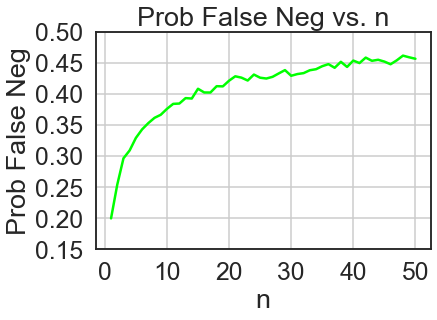

In [439]:
plt.plot(x,y, 'lime')
plt.xticks(np.arange(0, 60, 10))
plt.yticks(np.arange(0.15, 0.55, .05))
plt.xlabel("n")
plt.ylabel("Prob False Neg")
plt.title("Prob False Neg vs. n")
plt.grid()
plt.show()

In [440]:
def run_length(n):
    run_lengths=[]
    variances=simulation4(n, 50)[2]
    for i in range(n):
        run_lengths.append(1.96**2*variances[i]/(.02**2))
    return run_lengths

In [441]:
a= run_length(10)
print(a)

[1719.3406685255018, 2132.439452676962, 1877.559483495401, 1507.9644263725245, 1783.5034040383891, 2038.3701993793948, 2223.39041473474, 2160.2802680134405, 2387.2405730701466, 2422.0736912974867]


In [442]:
def table_sim(n):
    n_list=[]
    data_list=[]
    var_list=[]
    ci_list=[]
    for i in range(n):
        hehehe= simulation4(n, math.ceil(a[i]))
        n_value= hehehe[0][i]
        n_list.append(n_value)
        data_value= hehehe[1][i]
        data_list.append(data_value) 
        var_value= hehehe[2][i]
        var_list.append(var_value)
        ci_value= 1.96*(var_value**(.5))/(math.ceil(a[i])**(.5))
        ci_list.append(ci_value)
    dict= {'N Values': n_list, 'False Neg Probs': data_list, 'Half Width': ci_list}
    Table_2D= pd.DataFrame(dict)
    display(Table_2D)

In [443]:
table_sim(10)

<ipython-input-437-91be4764a790>:27: RuntimeWarning: overflow encountered in exp
  prob_false_neg= (1 + np.exp(np.double(inside_exp)))**(-1)


,N Values,False Neg Probs,Half Width
0,1,0.198893,0.018646
1,2,0.260484,0.018417
2,3,0.277623,0.020028
3,4,0.306857,0.023039
4,5,0.318172,0.021465
5,6,0.341879,0.020382
6,7,0.350688,0.019688
7,8,0.347880,0.019899
8,9,0.373798,0.019261
9,10,0.380020,0.019193


### Question 3

#### Part A:

The parameters are: X~B(202,0.97)

#### Part B:

In [6]:
C_1= (np.math.factorial(202))/(np.math.factorial(202)*np.math.factorial(202-202))
C_2= (np.math.factorial(202))/(np.math.factorial(201)*np.math.factorial(202-201))

partB= C_1*(0.97**202) + C_2 * (0.97**201) * 0.03
print(partB)

0.015419628571262119


**The probability that there will not be enough seats for the passengers who check in on time is: 1.54%**

#### Part C:

In [263]:
#Given values:
ticketprice= 250
completed= 40000
overbooked= 300
totalseats= 200
p= 0.97

In [324]:
#profit function
def profit(people_sold, people):
    total_overbooked= max((people-totalseats),0)
    return (people_sold*ticketprice - total_overbooked*overbooked - completed)

def simulation3(run):    
    avg_per_seat=[]
    for i in range(200,251):
        total_profits_for_seat_numb=[]
        for j in range(run):
            x= np.random.binomial(i, p)
            total_profits_for_seat_numb.append(profit(i, x))  
    
        avg_profit_for_seat_numb = sum(total_profits_for_seat_numb)/run
        avg_per_seat.append(avg_profit_for_seat_numb)
        
    optimal_profit=max(avg_per_seat)
    optimal_seat=avg_per_seat.index(optimal_profit)+200
    
    return optimal_profit, optimal_seat



In [326]:
print(simulation3(15000))

(11376.7, 209)


**The number of seats that should be sold to maximize the expected profit is 209. This was obtained by running multiple simulations for each 200 through 250 seats. Creating a list of the average profit for each seats 200 through 250, we found the maximum average profit, which resulted to be $11376.70, correlating with 209 seats.** 

### Question 4

If you use a multiplicative LCG x_(n+1) = (ax_n) mod m where a is even and m is a multiple of 4, in which the generator does not have a full period, then when x_n hits zero then the subsequent values will eventually converge to 0. This is because: since a is always even then we know the generated values will also be even (other than x_0); and since m is a multiple of 4, then the values will eventually converge to 0. Overall, the generated random variables (U_0, U_1), (U_2, U_3), (U_4, U_5), etc. will lie on a small number of parallel lines. 